In [17]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
print(sys.version)
print(pd.__version__)
print(sklearn.__version__)
from sklearn.model_selection import train_test_split

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
1.1.3
0.23.2


In [18]:
import seaborn as sns
import scipy

In [19]:
df=pd.read_csv("creditcard.csv")
print(df.shape)
print(df.columns)

(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [20]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [21]:
df=df.sample(frac=0.1)
print(df.shape)

(28481, 31)


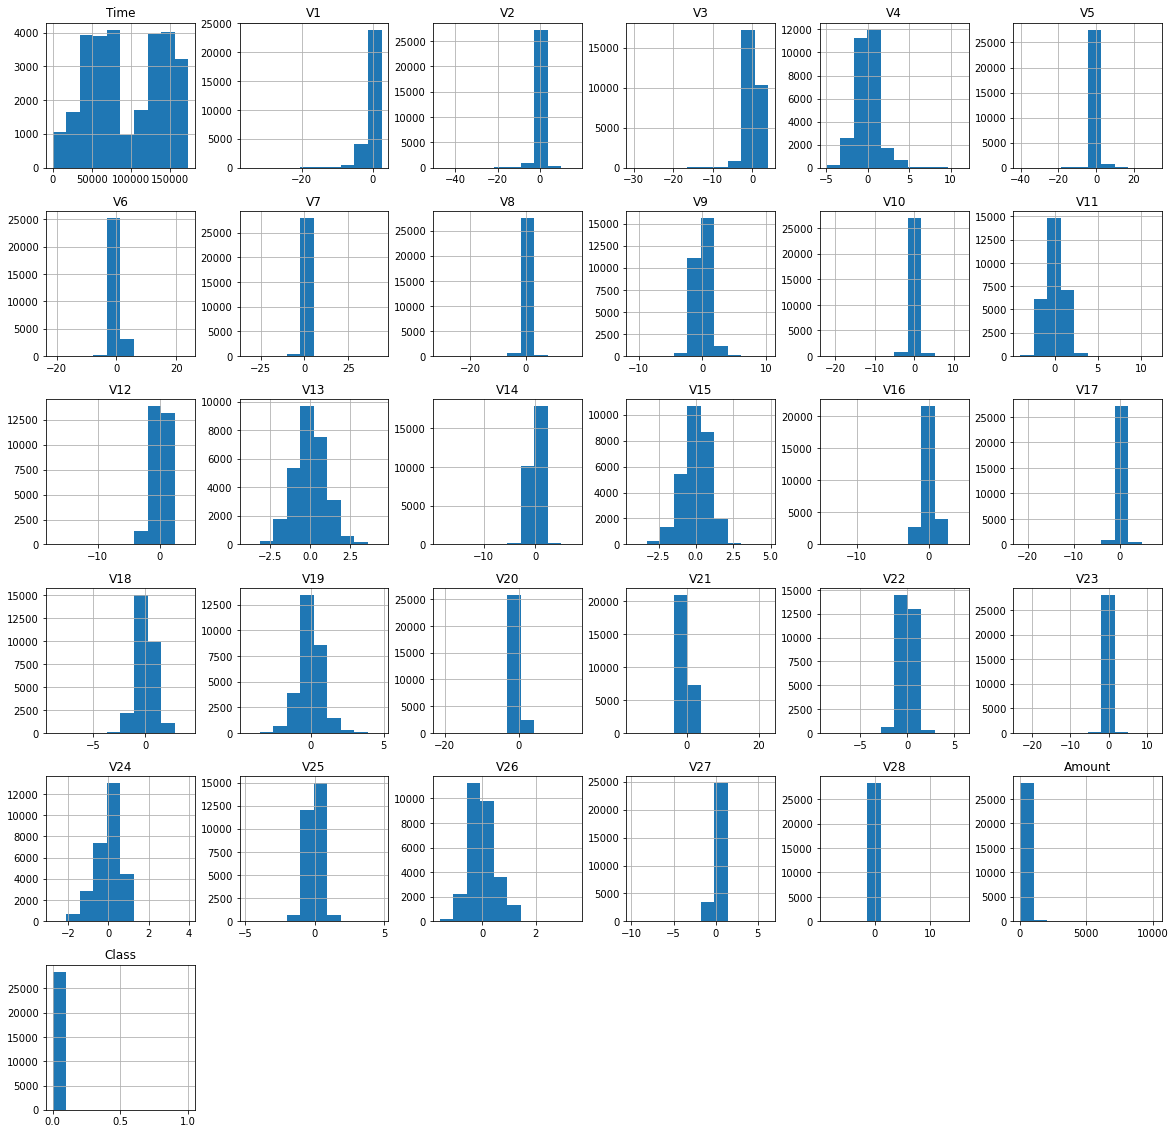

In [22]:
df.hist(figsize=(20,20))
plt.show()

In [23]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count   28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean    94405.317826     -0.012889     -0.012646      0.003155     -0.010707   
std     47291.134773      1.984069      1.654019      1.538495      1.402112   
min        12.000000    -35.557253    -47.429676    -30.177317     -4.938824   
25%     54268.000000     -0.931081     -0.616772     -0.865540     -0.850071   
50%     83969.000000      0.017358      0.054437      0.192567     -0.026709   
75%    138697.000000      1.307119      0.801859      1.034983      0.730883   
max    172788.000000      2.420064     16.697832      4.040465     11.345120   

                 V5            V6            V7            V8            V9  \
count  28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean      -0.005137     -0.006683     -0.010762      0.005381     -0.005011   
std        1.417083      1.337448      1.2

In [24]:
print(len(df[df["Class"]==1])/len(df[df["Class"]==0]))

0.0020406009217886923


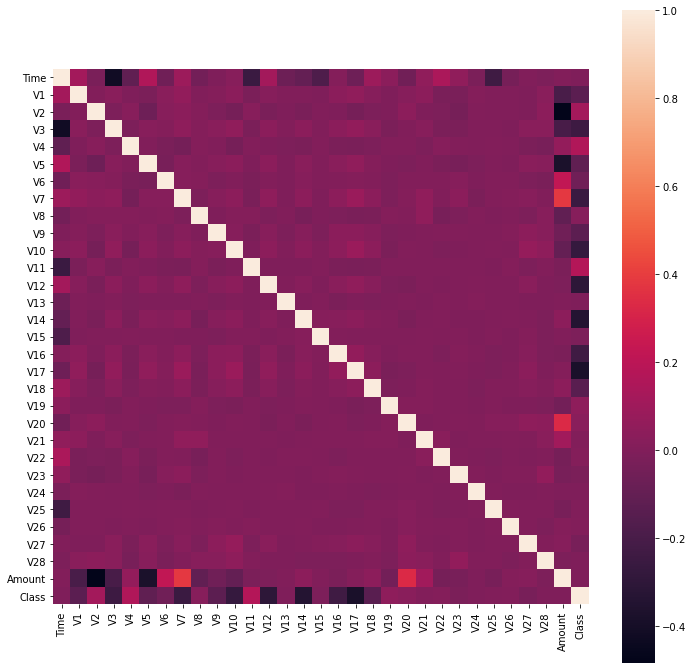

In [26]:
corrmat=df.corr()
fig=plt.figure(figsize=(12,12))
sns.heatmap(corrmat,square=True)
plt.show()

In [31]:
z=df.columns.tolist()
z=[i for i in z if i not in ["Class","Time"]]
X=df[z]
Y=df["Class"]
print(X.shape)
print(Y.shape)

(28481, 29)
(28481,)


In [32]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


In [33]:
mod1=IsolationForest(max_samples=len(X),contamination=0.0020406)
mod2=LocalOutlierFactor(n_neighbors=10,contamination=0.0020406)

In [35]:
n_outliers=len(df[df["Class"]==1])
mod1.fit(X)
ok1=mod1.predict(X)
ok2=mod2.fit_predict(X)
#ok2=mod2.predict(X)
ok1[ok1==1]=0
ok1[ok1==-1]=1
ok2[ok2==1]=0
ok2[ok2==-1]=1
print(accuracy_score(Y,ok1))
print(accuracy_score(Y,ok2))
print(classification_report(Y,ok1))
print(classification_report(Y,ok2))

0.9973666654962958
0.9967346652154068
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28423
           1       0.36      0.36      0.36        58

    accuracy                           1.00     28481
   macro avg       0.68      0.68      0.68     28481
weighted avg       1.00      1.00      1.00     28481

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28423
           1       0.20      0.21      0.21        58

    accuracy                           1.00     28481
   macro avg       0.60      0.60      0.60     28481
weighted avg       1.00      1.00      1.00     28481

